In [25]:
import pandas as pd

data = pd.read_csv('film.csv')

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

vectorizer = TfidfVectorizer()

X = data['review']
X = vectorizer.fit_transform(X)

y = data['sentiment']
y.loc[y == 'Negative'] = 0
y.loc[y == 'Positive'] = 1

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [28]:
from sklearn.cluster import KMeans

model = KMeans()
# model.fit(X[-1000:])

C:\Users\Admin\Anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


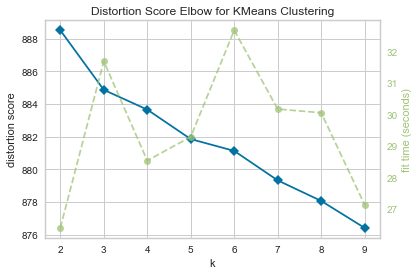

In [29]:
# if we want determine automatically k

from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X[-1000:])
visualizer.poof()

In [30]:
model.predict(X[0:100])

array([0, 0, 0, 7, 0, 3, 3, 0, 0, 0, 0, 7, 0, 0, 3, 0, 7, 7, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 7, 7, 3, 0, 0, 0, 0, 7, 7, 7, 0, 3, 7, 3, 7, 0, 3,
       3, 0, 0, 0, 7, 3, 0, 0, 0, 4, 3, 0, 0, 0, 3, 7, 7, 7, 0, 0, 7, 0,
       0, 7, 0, 0, 7, 7, 3, 7, 0, 0, 7, 0, 3, 0, 3, 0, 7, 7, 7, 7, 7, 0,
       7, 3, 0, 0, 7, 3, 0, 0, 0, 0, 0, 3])